In [ ]:
import urllib.request
import tarfile
import os
from PIL import Image

url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
tar_path = "dogs.tar"

print("Downloading...")
urllib.request.urlretrieve(url, tar_path)

print("Extracting...")
with tarfile.open(tar_path) as tar:
    tar.extractall("dogs")

DATASET_DIR = "dogs/Images/"

shapes = sorted([
    Image.open(os.path.join(root, file)).size
    for root, _, files in os.walk(DATASET_DIR)
    for file in files
    if file.lower().endswith((".jpg",".png",".jpeg"))
])

print("Total images:", len(shapes))
print("Unique shapes (first 20):", shapes[:20])


Downloading...


In [7]:
all_shapes = [] 


count = 0

for root, _, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            shape = img.size  # (width, height)
            all_shapes.append(shape)
            count += 1
            print(f"Image {count}: {shape}")

print("\nTotal images found:", count)
print("Unique image shapes:", set(all_shapes))

Image 1: (448, 400)
Image 2: (375, 500)
Image 3: (500, 375)
Image 4: (333, 500)
Image 5: (500, 333)
Image 6: (375, 500)
Image 7: (375, 500)
Image 8: (500, 375)
Image 9: (375, 500)
Image 10: (500, 375)
Image 11: (280, 252)
Image 12: (375, 500)
Image 13: (500, 375)
Image 14: (500, 375)
Image 15: (500, 375)
Image 16: (500, 400)
Image 17: (375, 500)
Image 18: (500, 375)
Image 19: (500, 400)
Image 20: (419, 290)
Image 21: (351, 500)
Image 22: (357, 500)
Image 23: (500, 375)
Image 24: (375, 500)
Image 25: (500, 375)
Image 26: (284, 422)
Image 27: (375, 500)
Image 28: (500, 375)
Image 29: (333, 500)
Image 30: (500, 375)
Image 31: (500, 375)
Image 32: (500, 375)
Image 33: (1024, 768)
Image 34: (500, 399)
Image 35: (500, 375)
Image 36: (500, 375)
Image 37: (500, 361)
Image 38: (500, 384)
Image 39: (500, 375)
Image 40: (351, 500)
Image 41: (375, 500)
Image 42: (500, 375)
Image 43: (500, 375)
Image 44: (500, 375)
Image 45: (500, 359)
Image 46: (500, 350)
Image 47: (375, 500)
Image 48: (500, 375)


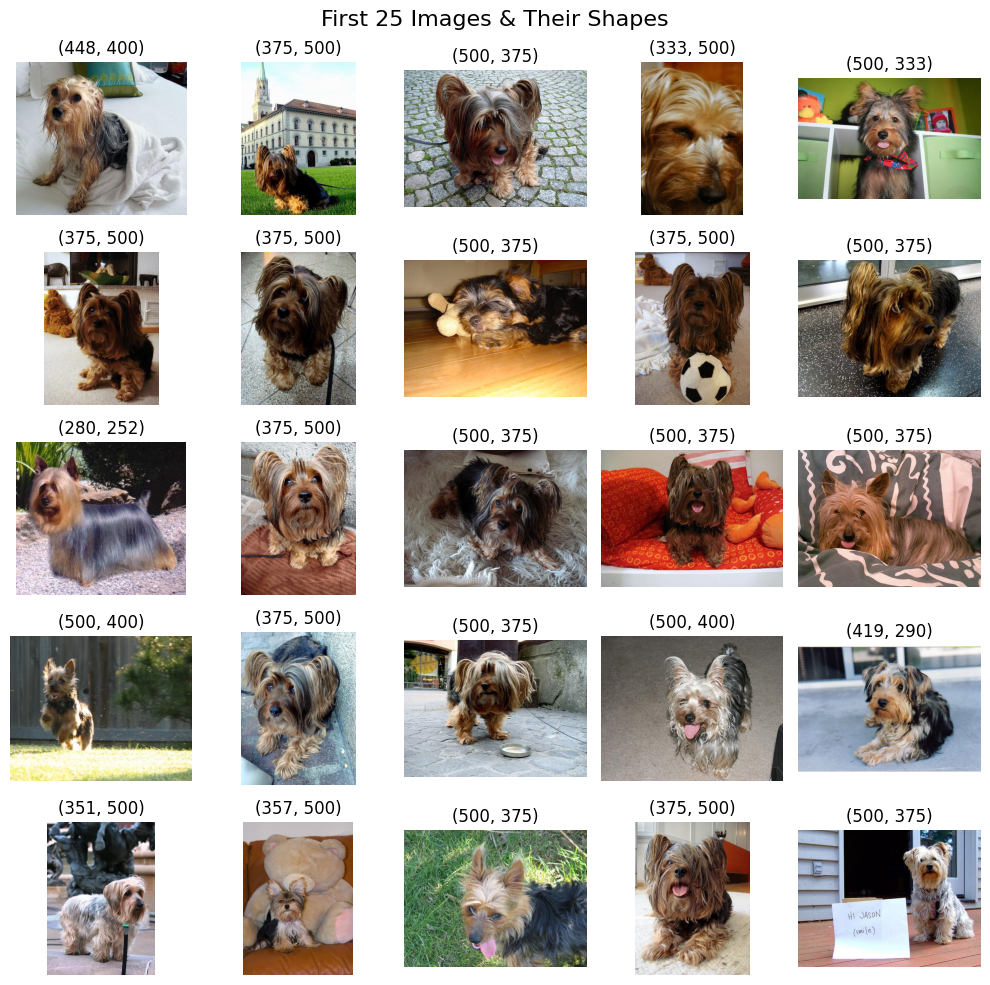

In [4]:
import matplotlib.pyplot as plt
import numpy as np
image_list = []
shape_list = []

limit = 25
count = 0

for root, _, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(root, file)
            img = Image.open(img_path).convert("RGB")

            image_list.append(np.array(img))
            shape_list.append(img.size)

            count += 1
            if count == limit:
                break
    if count == limit:
        break

plt.figure(figsize=(10, 10))
for i in range(limit):
    plt.subplot(5, 5, i+1)
    plt.imshow(image_list[i])
    plt.title(str(shape_list[i]))  
    plt.axis("off")

plt.suptitle("First 25 Images & Their Shapes", fontsize=16)
plt.tight_layout()
plt.show()


In [5]:
import os
from PIL import Image
import numpy as np

DATASET_DIR = "dogs/Images/"   # folder containing extracted dataset

TARGET_SIZE = (128, 128)  # <-- choose your uniform size (W,H)

resized_images = []   # will hold all resized images
shapes = []           # to store shapes after resizing
count = 0

print("Resizing all images to:", TARGET_SIZE)

for root, _, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(root, file)

            # Load image
            img = Image.open(img_path).convert("RGB")

            # Resize
            img = img.resize(TARGET_SIZE)

            # Convert to NumPy array
            img_np = np.array(img)

            resized_images.append(img_np)
            shapes.append(img_np.shape)

            count += 1
            print(f"Image {count} resized to {img_np.shape}")

# Convert final list to NumPy array
resized_images = np.array(resized_images)

print("\nTotal images resized:", resized_images.shape[0])
print("Each image final shape:", resized_images[0].shape)


Resizing all images to: (128, 128)
Image 1 resized to (128, 128, 3)
Image 2 resized to (128, 128, 3)
Image 3 resized to (128, 128, 3)
Image 4 resized to (128, 128, 3)
Image 5 resized to (128, 128, 3)
Image 6 resized to (128, 128, 3)
Image 7 resized to (128, 128, 3)
Image 8 resized to (128, 128, 3)
Image 9 resized to (128, 128, 3)
Image 10 resized to (128, 128, 3)
Image 11 resized to (128, 128, 3)
Image 12 resized to (128, 128, 3)
Image 13 resized to (128, 128, 3)
Image 14 resized to (128, 128, 3)
Image 15 resized to (128, 128, 3)
Image 16 resized to (128, 128, 3)
Image 17 resized to (128, 128, 3)
Image 18 resized to (128, 128, 3)
Image 19 resized to (128, 128, 3)
Image 20 resized to (128, 128, 3)
Image 21 resized to (128, 128, 3)
Image 22 resized to (128, 128, 3)
Image 23 resized to (128, 128, 3)
Image 24 resized to (128, 128, 3)
Image 25 resized to (128, 128, 3)
Image 26 resized to (128, 128, 3)
Image 27 resized to (128, 128, 3)
Image 28 resized to (128, 128, 3)
Image 29 resized to (1

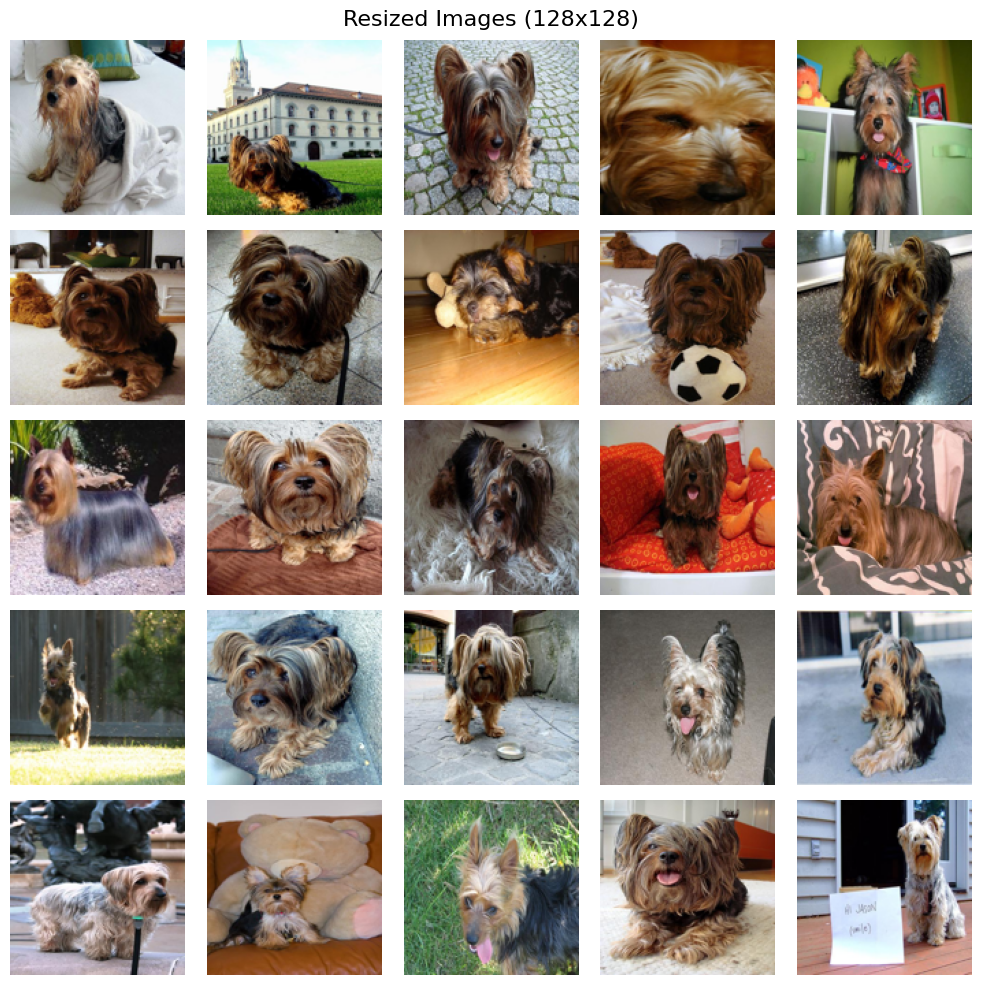

In [6]:
import matplotlib.pyplot as plt

# resized_images must be a NumPy array: (N, H, W, 3)

plt.figure(figsize=(10, 10))

for i in range(25):  # show first 25 images
    plt.subplot(5, 5, i+1)
    plt.imshow(resized_images[i])
    plt.axis("off")

plt.suptitle("Resized Images (128x128)", fontsize=16)
plt.tight_layout()
plt.show()
